<a href="https://colab.research.google.com/github/bhavnajha100/TitanicData/blob/main/Analyse_titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 1. Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')



In [ ]:
# 2. Basic Exploration

# Shape of dataset
print(df.shape)

# Info about dataset and missing values
print(df.info())

# Summary statiscs for numeric columns
print(df.describe)

# Check missing values
print(df.isnull().sum())



In [ ]:
# 3. Handling missing values
# For simplicity, filling missing age with median, and drop rows with missing embarked
# Filling missing age with median because median values are robut to outliers
# Using inplace=True - changes the data permanently
# To keep the original data rather use df['age'] = df['age'].fillna(df['age'].median())
df['age'].fillna(df['age'].median(), inplace=True)
# Dropping columns with value embarked because it has only 2 column with this value
df.dropna(subset=['embarked'], inplace=True)

In [ ]:
# 4. Analyse survival rate

# Overall survival rate
sns.countplot(x='survived', data=df)
plt.show()

# Analyse Survival rate by gender
sns.countplot(x='survived', hue='sex', data=df) #in seaborn hue is used to add a categorical separation to the data by coloring different groups
plt.show()

# Analyse Survival rate by passenger class
sns.countplot(x='survived', hue='class', data=df)
plt.show()

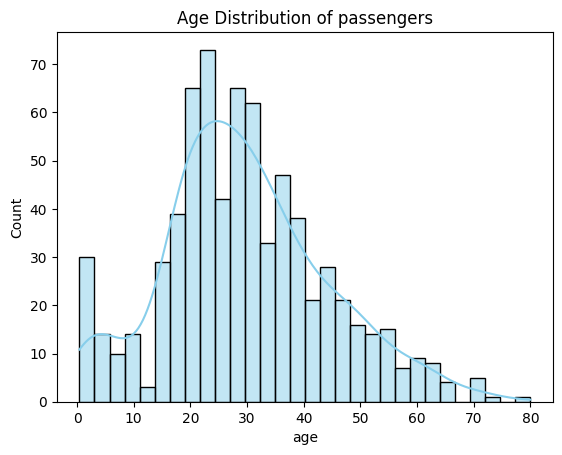

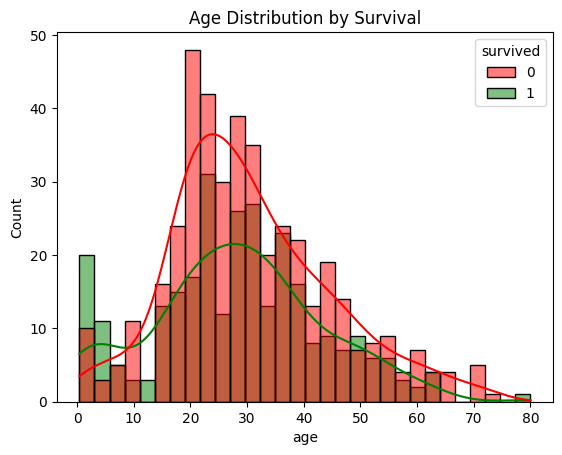

In [19]:
# 5. Age Distribution
# Histogram of ages
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution of passengers')
plt.show()

# Histogram of ages by survival
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True, palette=['red', 'green'])
plt.title('Age Distribution by Survival')
plt.show()

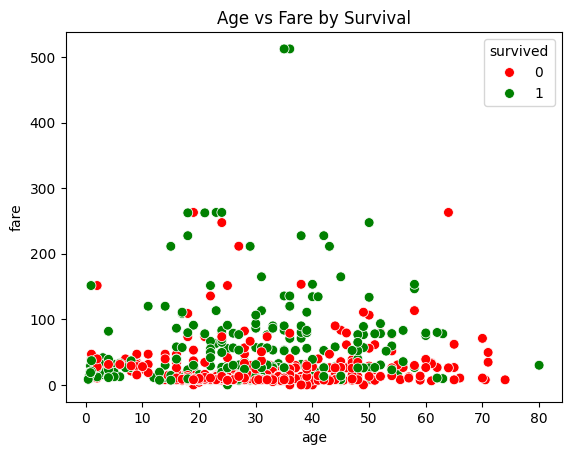

In [21]:
# 6. Fare vs Age Scatterplot
sns.scatterplot(x='age', y='fare', data=df, hue='survived', palette=['red', 'green'], s=50)
plt.title('Age vs Fare by Survival')
plt.show()

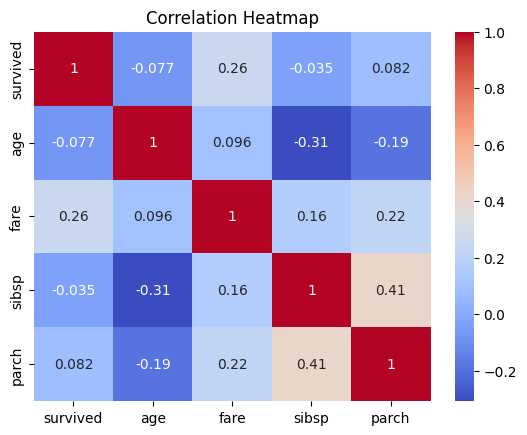

In [22]:
# 7. Correlation Heatmap

corr = df[['survived', 'age', 'fare', 'sibsp', 'parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()